In [117]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

**Data Preparation**

In [119]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [121]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Changing zero value cells to medians of its columns**

In [122]:
from sklearn.impute import SimpleImputer
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_invalid_zeros] = data[cols_with_invalid_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
data[cols_with_invalid_zeros] = imputer.fit_transform(data[cols_with_invalid_zeros])

(data == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Visualizing data after cleaning**

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


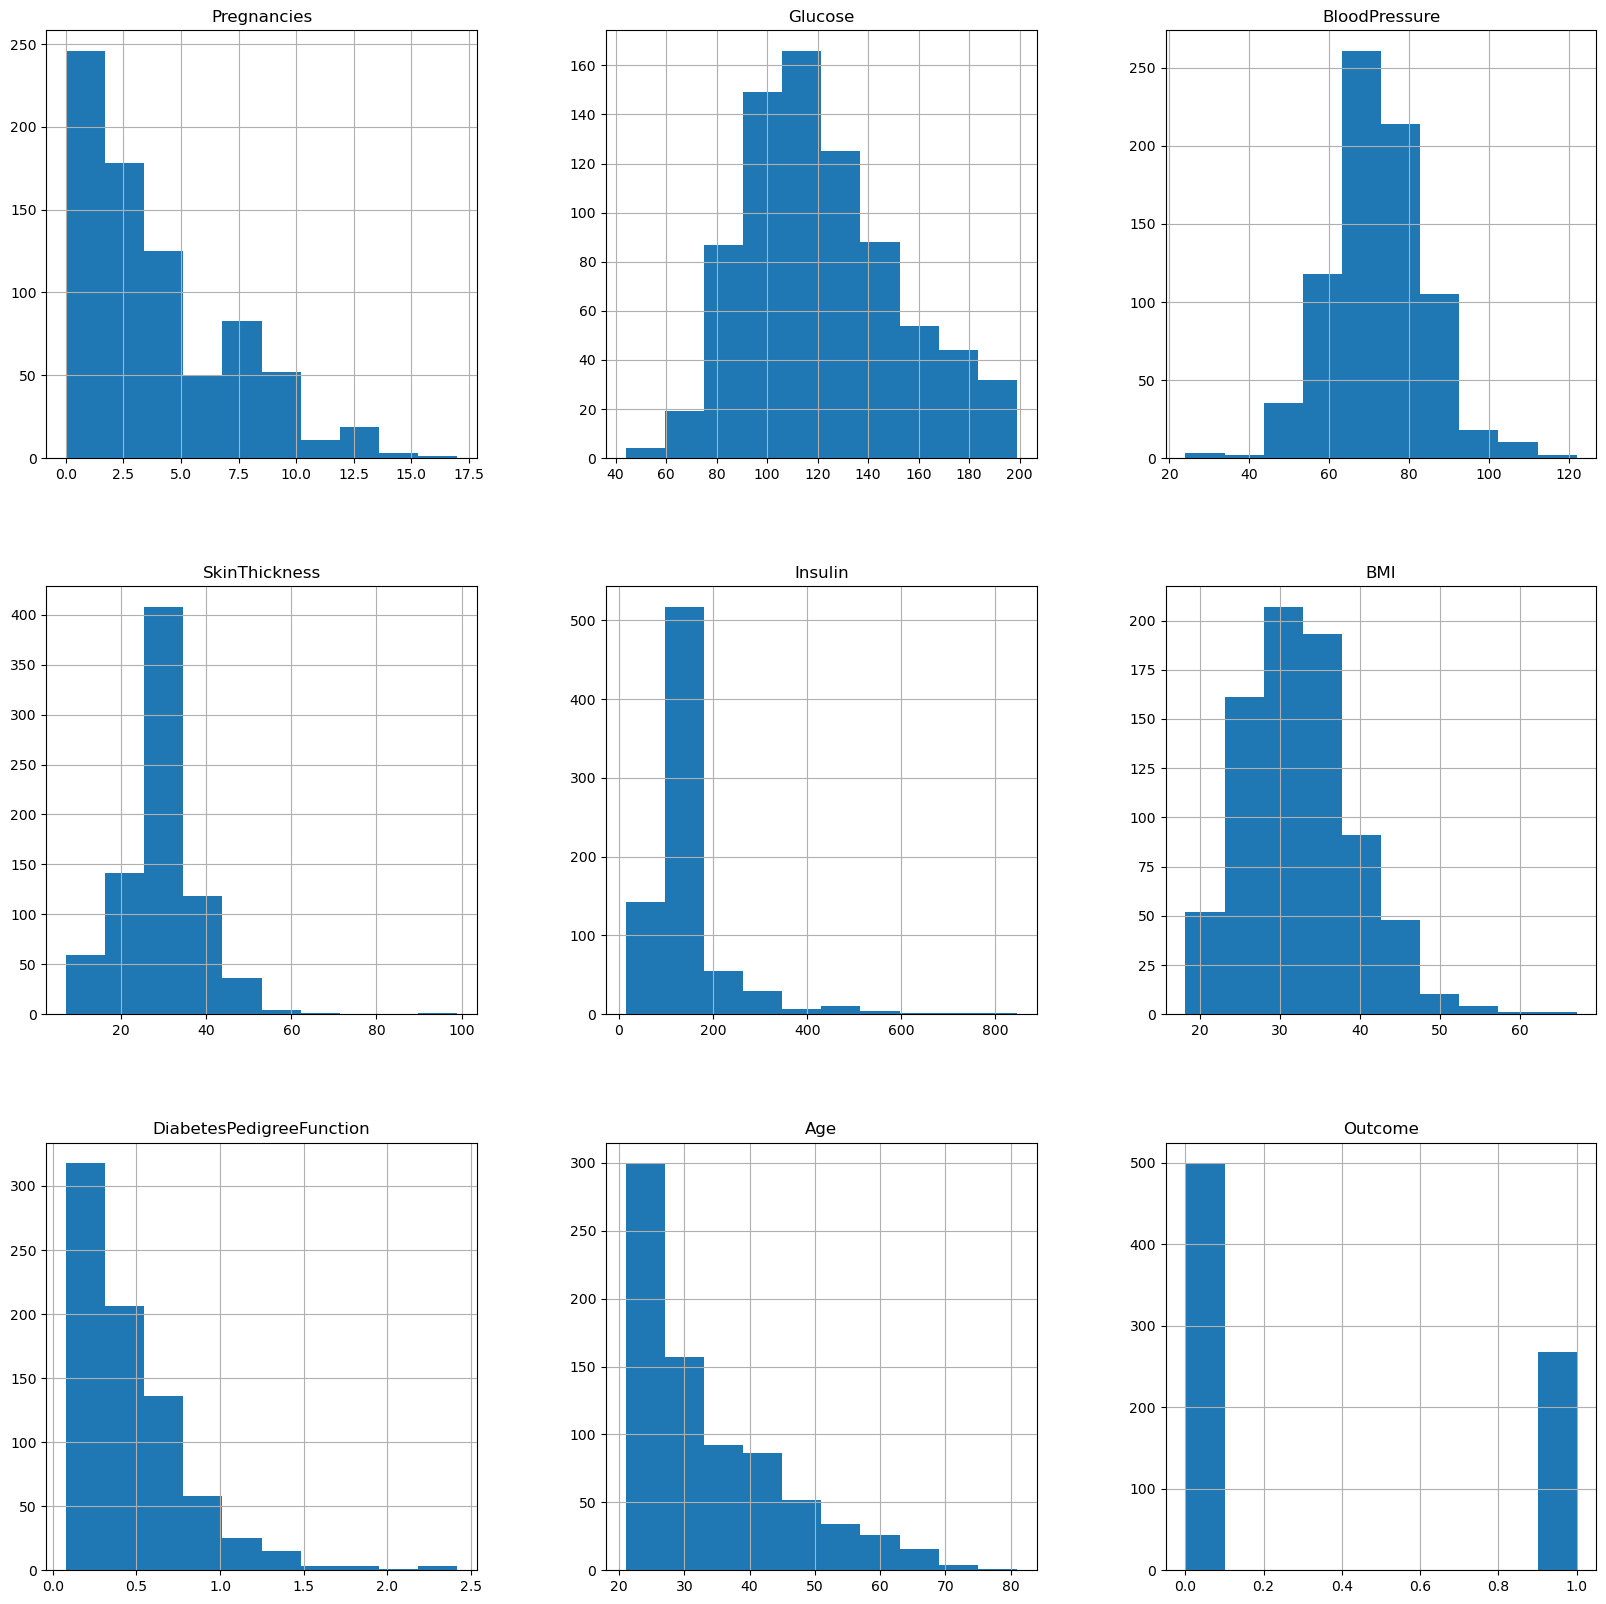

In [124]:
p = data.hist(figsize=(20,20))

In [ ]:
# Usunięto - clipping outliers będzie wykonany TYLKO na zbiorze treningowym po splicie


In [ ]:
X = data.drop('Outcome', axis=1).values.astype(np.float32)
y = data['Outcome'].values.astype(np.int64)

print(f"Rozmiar danych: X={X.shape}, y={y.shape}")
print(f"Rozkład klas: Klasa 0={np.sum(y == 0)}, Klasa 1={np.sum(y == 1)}")


Rozmiar danych: X=(768, 8), y=(768,)
Rozkład klas: Klasa 0=500, Klasa 1=268


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. SPLIT DANYCH (PRZED jakąkolwiek transformacją - zapobiega data leakage!)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)

print("=" * 60)
print("ROZKŁAD KLAS PRZED SMOTE:")
print("=" * 60)
print(f"Train  - Klasa 0: {np.sum(y_train == 0):3d}, Klasa 1: {np.sum(y_train == 1):3d}")
print(f"Valid  - Klasa 0: {np.sum(y_valid == 0):3d}, Klasa 1: {np.sum(y_valid == 1):3d}")
print(f"Test   - Klasa 0: {np.sum(y_test == 0):3d}, Klasa 1: {np.sum(y_test == 1):3d}")

# 2. SMOTE - TYLKO na train set
smote = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n" + "=" * 60)
print("ROZKŁAD KLAS PO SMOTE:")
print("=" * 60)
print(f"Train  - Klasa 0: {np.sum(y_train == 0):3d}, Klasa 1: {np.sum(y_train == 1):3d}")
print(f"Valid  - Klasa 0: {np.sum(y_valid == 0):3d}, Klasa 1: {np.sum(y_valid == 1):3d}")
print(f"Test   - Klasa 0: {np.sum(y_test == 0):3d}, Klasa 1: {np.sum(y_test == 1):3d}")

# 3. CLIPPING OUTLIERS - TYLKO na train set (uczenie parametrów)
def clip_outliers_zscore(X_train, columns, threshold=3):
    """Clip outliers using Z-score. Returns clipped data and bounds."""
    X_clipped = X_train.copy()
    bounds = {}
    
    for col_idx in columns:
        col_data = X_train[:, col_idx]
        mean = col_data.mean()
        std = col_data.std()
        
        upper_bound = mean + threshold * std
        lower_bound = mean - threshold * std
        
        X_clipped[:, col_idx] = np.clip(col_data, lower_bound, upper_bound)
        bounds[col_idx] = (lower_bound, upper_bound)
    
    return X_clipped, bounds

def clip_outliers_iqr(X_train, columns, multiplier=1.5):
    """Clip outliers using IQR. Returns clipped data and bounds."""
    X_clipped = X_train.copy()
    bounds = {}
    
    for col_idx in columns:
        col_data = X_train[:, col_idx]
        Q1 = np.percentile(col_data, 25)
        Q3 = np.percentile(col_data, 75)
        IQR = Q3 - Q1
        
        upper_bound = Q3 + multiplier * IQR
        lower_bound = Q1 - multiplier * IQR
        
        X_clipped[:, col_idx] = np.clip(col_data, lower_bound, upper_bound)
        bounds[col_idx] = (lower_bound, upper_bound)
    
    return X_clipped, bounds

def apply_bounds(X, bounds):
    """Apply learned bounds to validation/test data."""
    X_clipped = X.copy()
    for col_idx, (lower, upper) in bounds.items():
        X_clipped[:, col_idx] = np.clip(X[:, col_idx], lower, upper)
    return X_clipped

# Feature indices: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
zscore_columns = [1, 2, 3, 5]  # Glucose, BloodPressure, SkinThickness, BMI
iqr_columns = [0, 4, 6, 7]     # Pregnancies, Insulin, DiabetesPedigreeFunction, Age

# Clip outliers on train set and learn bounds
X_train, zscore_bounds = clip_outliers_zscore(X_train, zscore_columns, threshold=3)
X_train, iqr_bounds = clip_outliers_iqr(X_train, iqr_columns, multiplier=1.5)

# Apply learned bounds to validation and test sets
X_valid = apply_bounds(X_valid, zscore_bounds)
X_valid = apply_bounds(X_valid, iqr_bounds)

X_test = apply_bounds(X_test, zscore_bounds)
X_test = apply_bounds(X_test, iqr_bounds)

print("\n" + "=" * 60)
print("CLIPPING OUTLIERS - ZAKOŃCZONE")
print("=" * 60)

# 4. SCALING - fit TYLKO na train, transform na wszystkich
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print("\n" + "=" * 60)
print("ROZMIARY ZBIORÓW PO PEŁNYM PREPROCESSING:")
print("=" * 60)
print(f"Train: {X_train.shape}")
print(f"Valid: {X_valid.shape}")
print(f"Test:  {X_test.shape}")
print("=" * 60)


ROZKŁAD KLAS PRZED SMOTE:
Train  - Klasa 0: 349, Klasa 1: 187
Valid  - Klasa 0:  75, Klasa 1:  41
Test   - Klasa 0:  76, Klasa 1:  40

ROZKŁAD KLAS PO SMOTE:
Train  - Klasa 0: 349, Klasa 1: 349
Valid  - Klasa 0:  75, Klasa 1:  41
Test   - Klasa 0:  76, Klasa 1:  40

ROZMIARY ZBIORÓW PO SMOTE I SKALOWANIU:
Train: (698, 8)
Valid: (116, 8)
Test:  (116, 8)


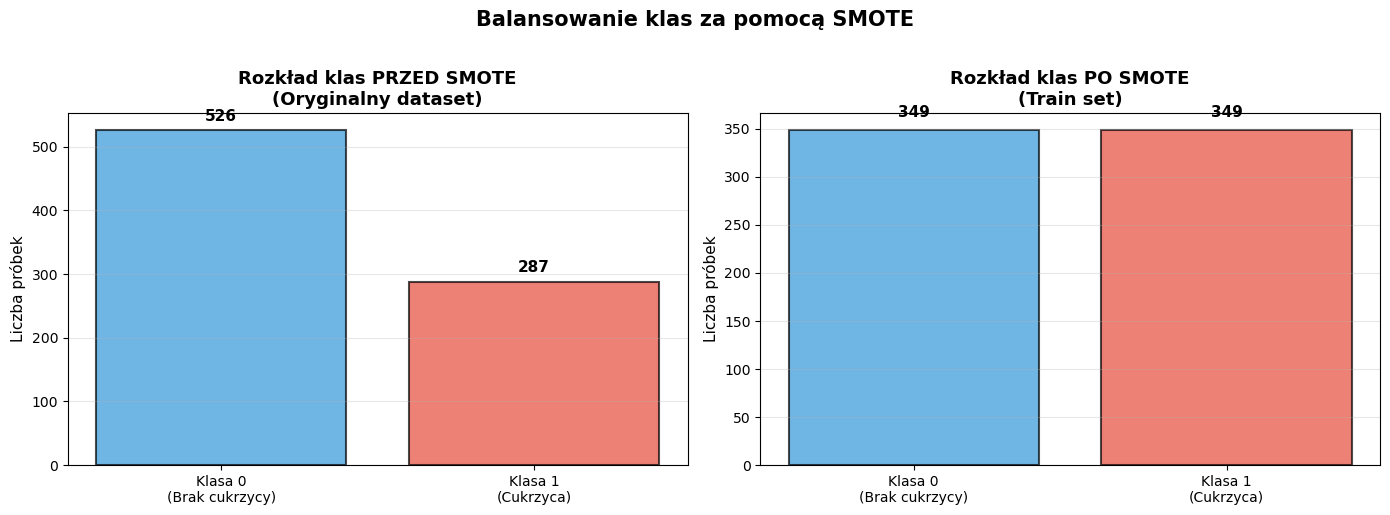


 PODSUMOWANIE:
   • Proporcja przed SMOTE: 1.83:1
   • Proporcja po SMOTE: 1.00:1
   • Wygenerowano 103 syntetycznych próbek klasy 1


In [130]:
# Wizualizacja balansu klas przed i po SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Przed SMOTE (używamy validation set jako reprezentację oryginalnego rozkładu)
class_0_original = np.sum(y_valid == 0) * (len(y_train) + len(y_valid)) / len(y_valid)
class_1_original = np.sum(y_valid == 1) * (len(y_train) + len(y_valid)) / len(y_valid)

axes[0].bar(['Klasa 0\n(Brak cukrzycy)', 'Klasa 1\n(Cukrzyca)'], 
            [class_0_original, class_1_original],
            color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_title('Rozkład klas PRZED SMOTE\n(Oryginalny dataset)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Liczba próbek', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([class_0_original, class_1_original]):
    axes[0].text(i, v + 10, f'{int(v)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Po SMOTE (train set)
axes[1].bar(['Klasa 0\n(Brak cukrzycy)', 'Klasa 1\n(Cukrzyca)'], 
            [np.sum(y_train == 0), np.sum(y_train == 1)],
            color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_title('Rozkład klas PO SMOTE\n(Train set)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Liczba próbek', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([np.sum(y_train == 0), np.sum(y_train == 1)]):
    axes[1].text(i, v + 10, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.suptitle('Balansowanie klas za pomocą SMOTE', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n PODSUMOWANIE:")
print(f"   • Proporcja przed SMOTE: {class_0_original/class_1_original:.2f}:1")
print(f"   • Proporcja po SMOTE: {np.sum(y_train == 0)/np.sum(y_train == 1):.2f}:1")
print(f"   • Wygenerowano {np.sum(y_train == 1) - int(class_1_original * len(y_train)/(len(y_train)+len(y_valid)))} syntetycznych próbek klasy 1")


In [131]:
from nn import NeuralNetwork

In [243]:
nn = NeuralNetwork(
    input_size=X_train.shape[1],
    hidden_size=[8,4,2],
    output_size=1,
    activation="relu",
    learning_rate=0.0005, 
    beta1=0.9,            
    beta2=0.999,         
    epsilon=1e-8,     
    batch_size= 192,
    l2_lambda=0.0005, 
    dropout_rate=0.1,  
    early_stopping_patience=25,  
    max_epochs=1000,
    seed=42
)

history = nn.train(X_train, y_train, X_val=X_valid, y_val=y_valid, verbose=True)

print("\n" + "="*60)
print("PODSUMOWANIE WYNIKÓW")
print("="*60)

y_test_pred = nn.predict(X_test)
test_acc = (y_test_pred.reshape(-1) == y_test).mean()

print(f"Last Epoch Train Accuracy:      {history['train_accuracy'][-1]*100:.2f}%")
print(f"Last Epoch Validation Accuracy: {history['val_accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy:       {test_acc*100:.2f}%")
print("="*60)

ROZPOCZĘCIE TRENINGU (Adam Optimizer)
Epoch    0 | Train: Loss=0.693112 Acc=51.29% | Val: Loss=0.693014 Acc=63.79%
Epoch    1 | Train: Loss=0.693087 Acc=51.29% | Val: Loss=0.692996 Acc=63.79%
Epoch    2 | Train: Loss=0.693056 Acc=58.02% | Val: Loss=0.692997 Acc=67.24%
Epoch    3 | Train: Loss=0.693025 Acc=58.45% | Val: Loss=0.692990 Acc=67.24%
Epoch    4 | Train: Loss=0.692992 Acc=58.31% | Val: Loss=0.692968 Acc=66.38%
Epoch  100 | Train: Loss=0.665820 Acc=72.78% | Val: Loss=0.682274 Acc=70.69%
Epoch  200 | Train: Loss=0.581034 Acc=76.93% | Val: Loss=0.632361 Acc=73.28%
Epoch  300 | Train: Loss=0.534024 Acc=78.65% | Val: Loss=0.598189 Acc=75.86%
Epoch  400 | Train: Loss=0.509226 Acc=79.66% | Val: Loss=0.577292 Acc=75.00%
Epoch  500 | Train: Loss=0.487720 Acc=82.09% | Val: Loss=0.565719 Acc=77.59%
Epoch  561 | Train: Loss=0.476848 Acc=83.38% | Val: Loss=0.563738 Acc=78.45%

[Early Stopping] No improvement for 25 epochs. Best was at epoch 536.

ZAKOŃCZENIE TRENINGU
Przyczyna zatrzymania:

In [240]:
nn = NeuralNetwork(
    input_size=X_train.shape[1],
    hidden_size=64,
    output_size=1,
    activation="relu",
    learning_rate=0.001, 
    beta1=0.9,            
    beta2=0.999,         
    epsilon=1e-8,     
    batch_size= 192,
    l2_lambda=0.001, 
    dropout_rate=0.1,  
    early_stopping_patience=25,  
    max_epochs=1000,
    seed=42
)

history = nn.train(X_train, y_train, X_val=X_valid, y_val=y_valid, verbose=True)

print("\n" + "="*60)
print("PODSUMOWANIE WYNIKÓW")
print("="*60)

y_test_pred = nn.predict(X_test)
test_acc = (y_test_pred.reshape(-1) == y_test).mean()

print(f"Last Epoch Train Accuracy:      {history['train_accuracy'][-1]*100:.2f}%")
print(f"Last Epoch Validation Accuracy: {history['val_accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy:       {test_acc*100:.2f}%")
print("="*60)

ROZPOCZĘCIE TRENINGU (Adam Optimizer)
Epoch    0 | Train: Loss=0.687121 Acc=61.75% | Val: Loss=0.639377 Acc=64.66%
Epoch    1 | Train: Loss=0.659033 Acc=63.90% | Val: Loss=0.624692 Acc=65.52%
Epoch    2 | Train: Loss=0.634474 Acc=65.19% | Val: Loss=0.612385 Acc=69.83%
Epoch    3 | Train: Loss=0.612896 Acc=66.91% | Val: Loss=0.603697 Acc=69.83%
Epoch    4 | Train: Loss=0.594603 Acc=69.34% | Val: Loss=0.596318 Acc=70.69%
Epoch  100 | Train: Loss=0.430815 Acc=79.51% | Val: Loss=0.511307 Acc=77.59%
Epoch  116 | Train: Loss=0.422523 Acc=79.66% | Val: Loss=0.512156 Acc=77.59%

[Early Stopping] No improvement for 25 epochs. Best was at epoch 91.

ZAKOŃCZENIE TRENINGU
Przyczyna zatrzymania: early_stopping (patience=25)
Liczba wykonanych epok: 117 / 1000
Najlepszy epoch: 91 (validation loss: 0.507581)
Przywrócono wagi z epoch 91

METRYKI WALIDACYJNE (z epoch 91):
  Loss: 0.507581
  Accuracy: 77.59%

METRYKI TRENINGOWE (z epoch 91):
  Loss: 0.435593
  Accuracy: 78.94%

PODSUMOWANIE WYNIKÓW
Last 

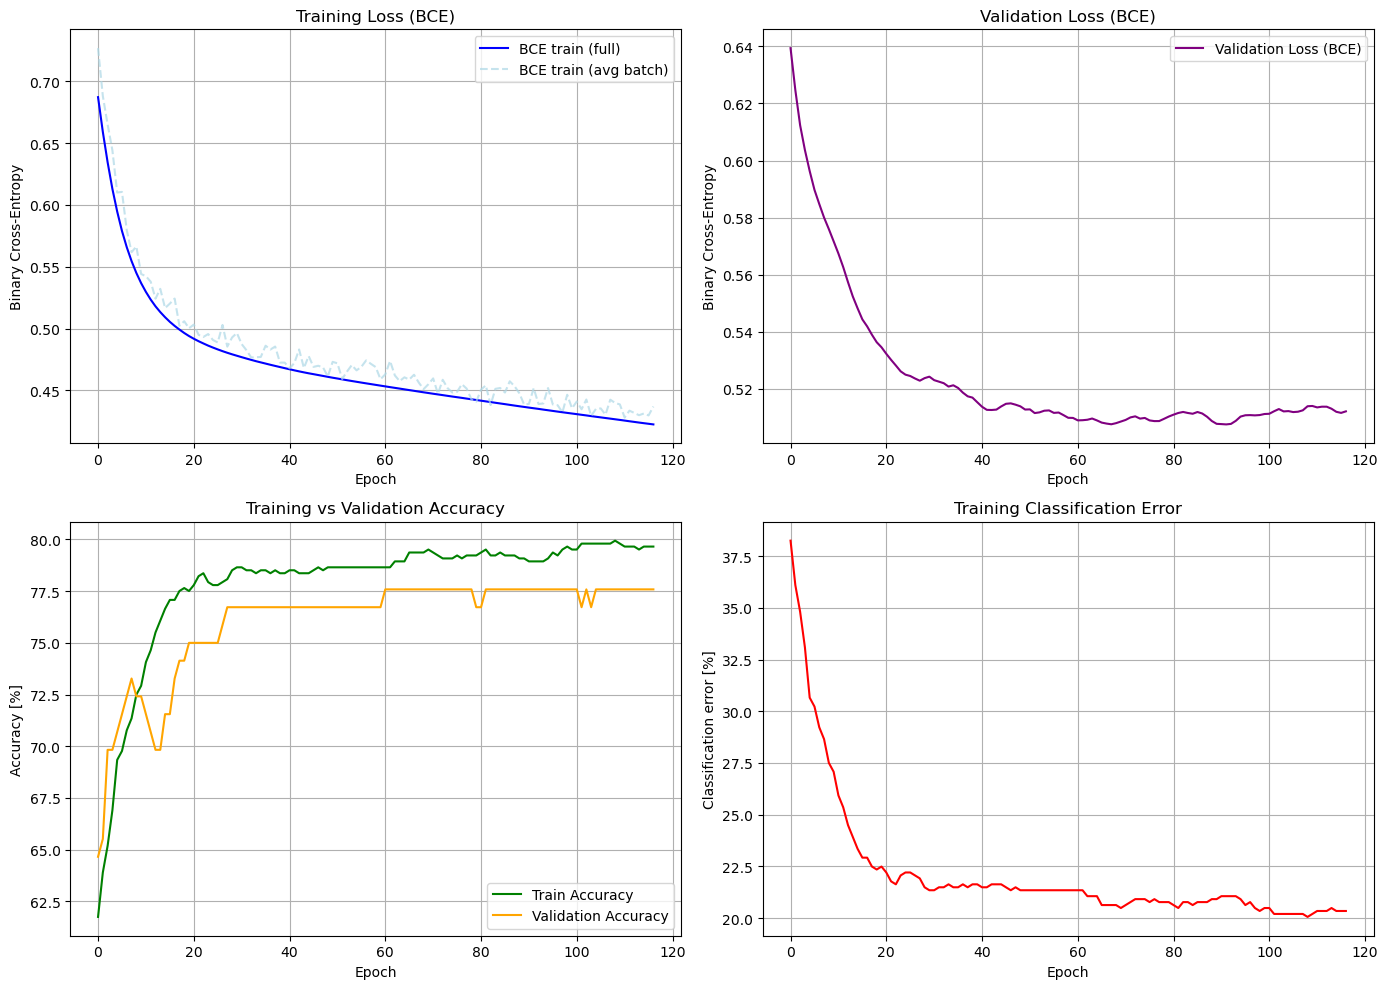

In [241]:
epochs = history["epoch"]
train_accuracy = history["train_accuracy"]
val_accuracy = history["val_accuracy"]
val_loss = history["val_loss"]


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(epochs, history["loss_full"], label="BCE train (full)", color='blue')
axs[0, 0].plot(epochs, history["loss_batches"], label="BCE train (avg batch)", 
               linestyle="--", alpha=0.7, color='lightblue')
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Binary Cross-Entropy")
axs[0, 0].set_title("Training Loss (BCE)")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(epochs, val_loss, label="Validation Loss (BCE)", color='purple')
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Binary Cross-Entropy")
axs[0, 1].set_title("Validation Loss (BCE)")
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 1].plot(epochs, np.array(history["class_error_full"]) * 100.0, color='red')
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("Classification error [%]")
axs[1, 1].set_title("Training Classification Error")
axs[1, 1].grid(True)

axs[1, 0].plot(epochs, np.array(train_accuracy) * 100, label="Train Accuracy", color='green')
axs[1, 0].plot(epochs, np.array(val_accuracy) * 100, label="Validation Accuracy", color='orange')
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Accuracy [%]")
axs[1, 0].set_title("Training vs Validation Accuracy")
axs[1, 0].legend()
axs[1, 0].grid(True)

plt.tight_layout()



Text(0.5, 0.98, 'Neural Network Weight Analysis')

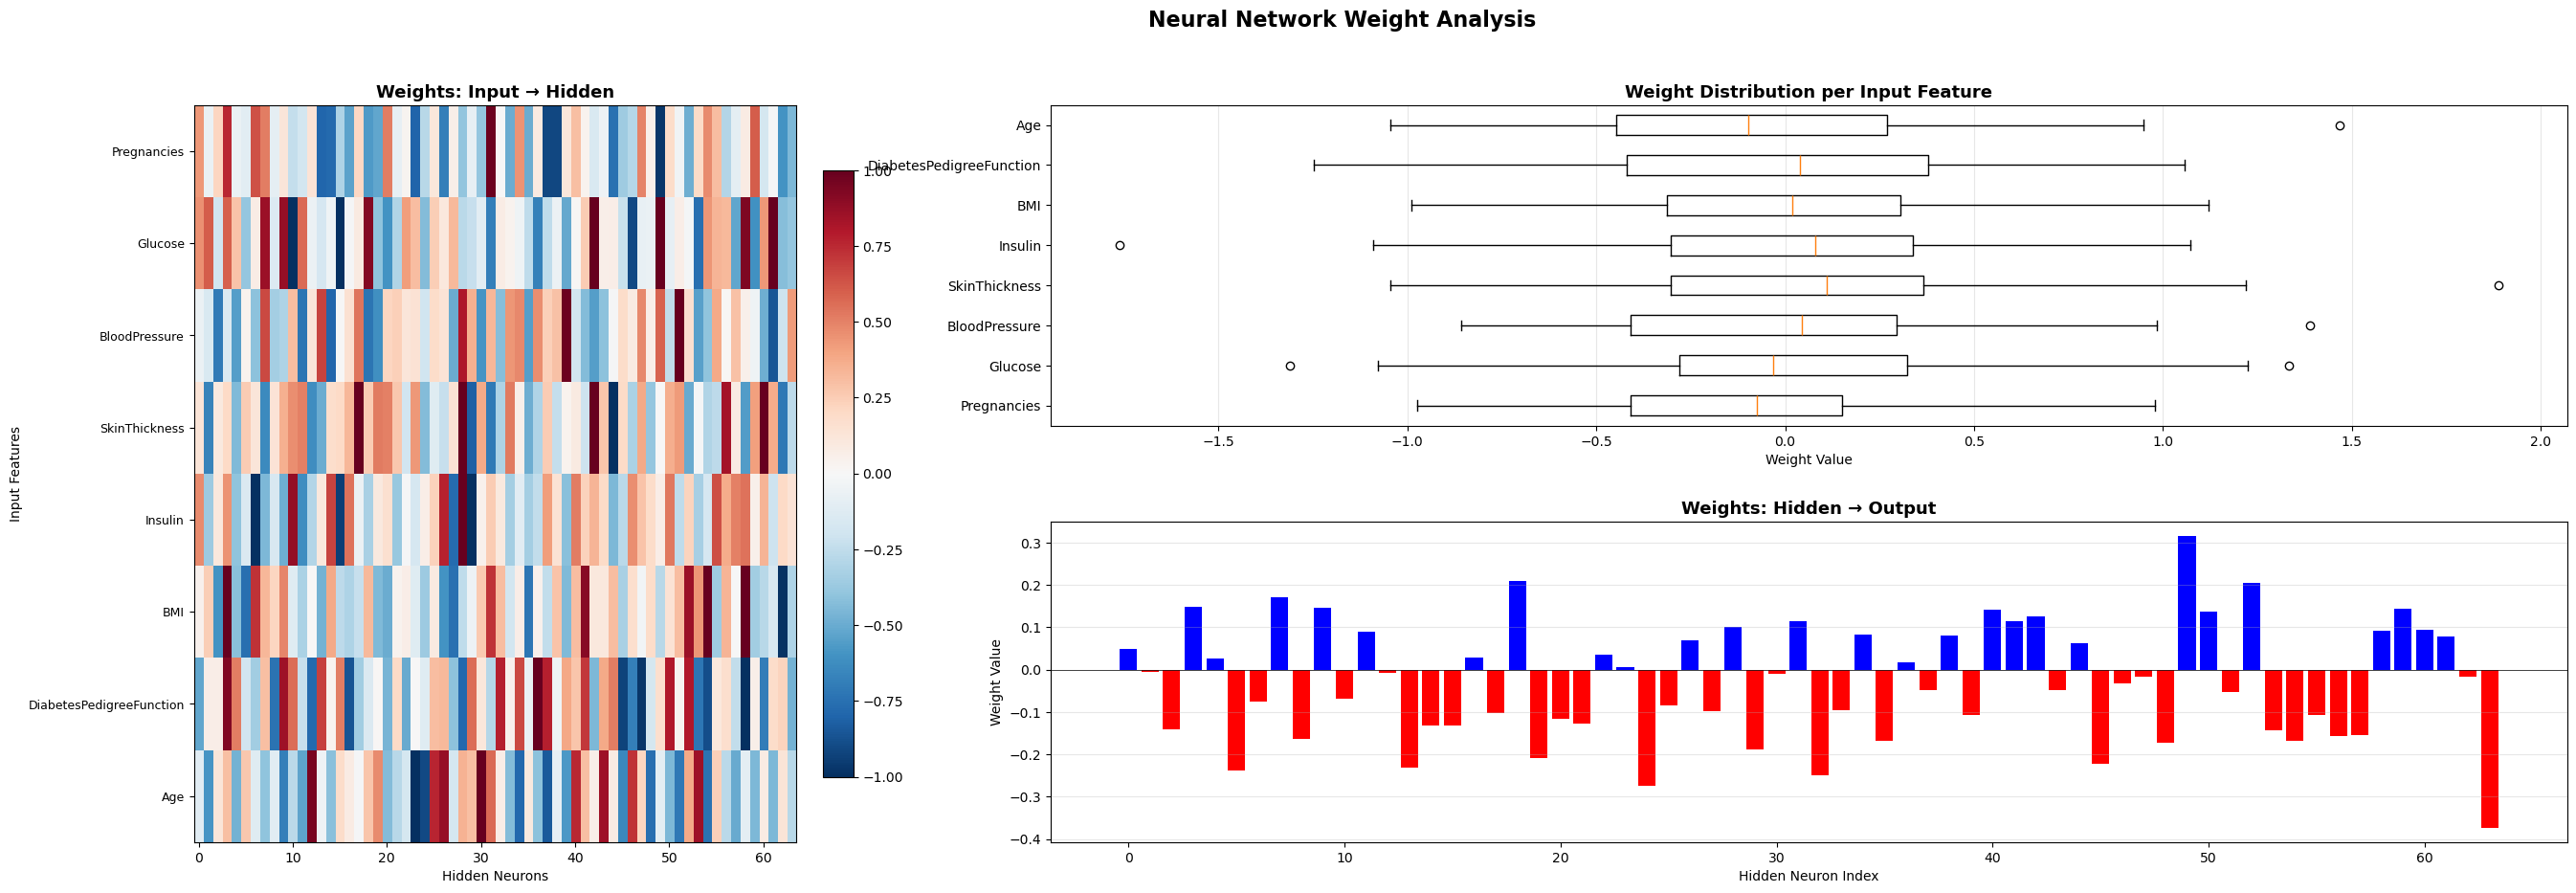

In [242]:
feature_names = data.columns[:-1].tolist()

fig = plt.figure(figsize=(32, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[:, 0])
im1 = ax1.imshow(nn.weights_input_hidden, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
ax1.set_title('Weights: Input → Hidden', fontsize=13, fontweight='bold')
ax1.set_xlabel('Hidden Neurons')
ax1.set_ylabel('Input Features')
ax1.set_yticks(range(len(feature_names)))
ax1.set_yticklabels(feature_names, fontsize=9)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

ax2 = fig.add_subplot(gs[0, 1:])
ax2.boxplot([nn.weights_input_hidden[i, :] for i in range(len(feature_names))],
            labels=feature_names, vert=False)
ax2.set_title('Weight Distribution per Input Feature', fontsize=13, fontweight='bold')
ax2.set_xlabel('Weight Value')
ax2.grid(True, alpha=0.3, axis='x')

ax3 = fig.add_subplot(gs[1, 1:])
hidden_neurons = range(nn.weights_hidden_output.shape[0])
bars = ax3.bar(hidden_neurons, nn.weights_hidden_output.flatten(), 
               color=['red' if w < 0 else 'blue' for w in nn.weights_hidden_output.flatten()])
ax3.set_title('Weights: Hidden → Output', fontsize=13, fontweight='bold')
ax3.set_xlabel('Hidden Neuron Index')
ax3.set_ylabel('Weight Value')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.grid(True, alpha=0.3, axis='y')

plt.suptitle('Neural Network Weight Analysis', fontsize=16, fontweight='bold', y=0.98)